## E2: Jaccard Coefficient

This experiment looks at the effectiveness of using the jaccard coefficient for ASAG.

**Jaccard Coefficient**
$$
\frac{\lvert X \cap Y \rvert}{\lvert X \rvert + \lvert Y \rvert - \lvert X \cap Y \rvert}
$$

The jaccard coefficient looks at the total words which $X$ and $Y$ have in common, normalized by the total words in both sentences after subtracting how many words they share.

It is run on the English, German and Spanish Datasets.

In [1]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.word_overlap as wo
from importlib import reload
import spacy

In [2]:
df2_en = utils.load_dataframe(language='en', version=2)
display(df2_en.head(2))
print(len(df2_en))

nlp_en = spacy.load('en')

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    3.5  
1   To simulate portions of the desired final pro...    5.0

2442


### E2.1 Jaccard v2.0_en Dataset

1. Remove Stopwords
2. Clean Punctuation
3. Stemming

In [5]:
pipeline_phases = { 'lowercase' : pp.lowercase, 
                    'stopwords' : pp.remove_stopwords,
                    'punctuation' : pp.remove_punctuation,
                    'stemming' : pp.stem}

pipeline1 = pp.create_pipeline(pipeline_phases, tokenizer=pp.tokenize)

results = wo.execute_word_overlap_model(df2_en, pipeline1, wo.jaccard_coefficient)

Accuracy: 8.149%
Precision: 48.869%
Recall: 8.149%
F1-Measure: 11.350%
Pearson's R: 0.38
Cohen's Kappa: 0.01
RMSE: 3.16
MAE: 2.86
Y-True Mean: 4.05
Y-Pred Mean: 1.22
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.31


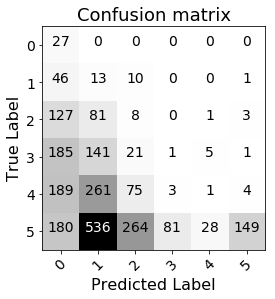

In [6]:
stats.print_big4(results['y_true'], results['y_pred'])
stats.print_stats(results['y_true'], results['y_pred'])
stats.plot_confusion_matrix(stats.cm(results['y_true'], results['y_pred']), classes=np.unique(results['y_true']))

### E2.2 Jaccard v2.0_en Dataset

1. Remove Stopwords
2. Clean Punctuation
3. Lemmatization

In [7]:
pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline2_2 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

res2_2 = wo.execute_word_overlap_model(df2_en, pipeline2_2, wo.jaccard_coefficient)

Accuracy: 8.272%
Precision: 49.794%
Recall: 8.272%
F1-Measure: 11.415%
Pearson's R: 0.37
Cohen's Kappa: 0.00
RMSE: 2.88
MAE: 2.59
Y-True Mean: 4.05
Y-Pred Mean: 1.51
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.24


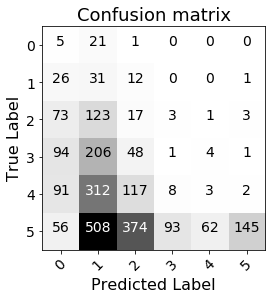

In [8]:
stats.print_big4(res2_2['y_true'], res2_2['y_pred'])
stats.print_stats(res2_2['y_true'], res2_2['y_pred'])
stats.plot_confusion_matrix(stats.cm(res2_2['y_true'], res2_2['y_pred']), classes=np.unique(res2_2['y_true']))

## E2.3 Jaccard v2.0_en Pass / Fail

In [9]:
df2_en_pf = utils.load_dataframe(language='en', version=2, pass_fail=True)
display(df2_en_pf.head(2))
print(len(df2_en_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline2_3 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

res2_3 = wo.execute_word_overlap_model(df2_en_pf, pipeline2_3, wo.jaccard_coefficient)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    1.0  
1   To simulate portions of the desired final pro...    1.0

2442


Accuracy: 20.680%
Precision: 90.853%
Recall: 20.680%
F1-Measure: 24.143%
Pearson's R: 0.08
Cohen's Kappa: 0.02
RMSE: 0.89
MAE: 0.79
Y-True Mean: 0.92
Y-Pred Mean: 0.13
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.34


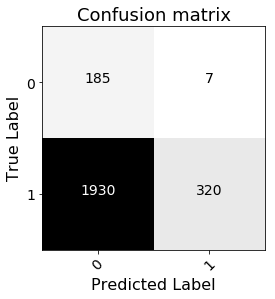

In [18]:
y_pred_pf = utils.convert_to_pass_fail(res2_3['y_pred'])

stats.print_big4(res2_3['y_true'], y_pred_pf)
stats.print_stats(res2_3['y_true'],y_pred_pf)
stats.plot_confusion_matrix(stats.cm(res2_3['y_true'], y_pred_pf), classes=np.unique(res2_3['y_true']))

## E2.4 v2.0_de German Language

In [20]:
df2_de = utils.load_dataframe(language='de', version=2)
display(df2_de.head(2))
print(len(df2_de))

nlp_de = spacy.load('de')

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline2_4 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

res2_4 = wo.execute_word_overlap_model(df2_de, pipeline2_4, wo.jaccard_coefficient)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   
1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    3.5   
1  Um das Verhalten von Teilen des gewünschten So...    5.0   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...  
1  Teile des gewünschten Endprodukts mit einem sc...

2442


Accuracy: 5.487%
Precision: 49.289%
Recall: 5.487%
F1-Measure: 7.664%
Pearson's R: 0.30
Cohen's Kappa: 0.01
RMSE: 3.59
MAE: 3.32
Y-True Mean: 4.05
Y-Pred Mean: 0.75
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.16


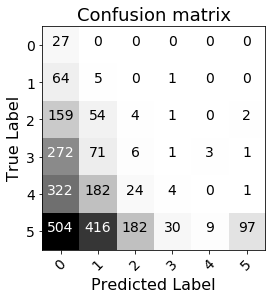

In [21]:
stats.print_big4(res2_4['y_true'], res2_4['y_pred'])
stats.print_stats(res2_4['y_true'], res2_4['y_pred'])
stats.plot_confusion_matrix(stats.cm(res2_4['y_true'], res2_4['y_pred']), classes=np.unique(res2_4['y_true']))

## E2.5 v2.0_de German Language Pass / Fail

In [24]:
df2_de_pf = utils.load_dataframe(language='de', version=2, pass_fail=True)
display(df2_de_pf.head(2))
print(len(df2_de_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline2_5 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

res2_5 = wo.execute_word_overlap_model(df2_de_pf, pipeline2_5, wo.jaccard_coefficient)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   
1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    1.0   
1  Um das Verhalten von Teilen des gewünschten So...    1.0   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...  
1  Teile des gewünschten Endprodukts mit einem sc...

2442


Accuracy: 13.677%
Precision: 90.325%
Recall: 13.677%
F1-Measure: 12.400%
Pearson's R: 0.05
Cohen's Kappa: 0.01
RMSE: 0.93
MAE: 0.86
Y-True Mean: 0.92
Y-Pred Mean: 0.06
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.24


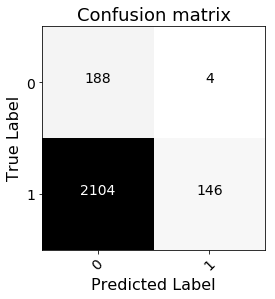

In [25]:
res2_5['y_pred'] = utils.convert_to_pass_fail(res2_5['y_pred'])

stats.print_big4(res2_5['y_true'], res2_5['y_pred'])
stats.print_stats(res2_5['y_true'], res2_5['y_pred'])
stats.plot_confusion_matrix(stats.cm(res2_5['y_true'], res2_5['y_pred']), classes=np.unique(res2_5['y_true']))

## E2.6 v2.0_es Spanish Language

In [26]:
df2_es = utils.load_dataframe(language='es', version=2)
display(df2_es.head(2))
print(len(df2_es))

nlp_es = spacy.load('es')

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline2_6 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

res2_6 = wo.execute_word_overlap_model(df2_es, pipeline2_6, wo.jaccard_coefficient)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   
1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    3.5   
1  Para simular el comportamiento de porciones de...    5.0   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...  
1  Para simular porciones del producto final dese...

2442


Accuracy: 5.160%
Precision: 52.887%
Recall: 5.160%
F1-Measure: 6.936%
Pearson's R: 0.35
Cohen's Kappa: 0.00
RMSE: 3.38
MAE: 3.12
Y-True Mean: 4.05
Y-Pred Mean: 0.95
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.14


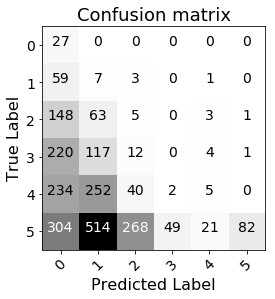

In [27]:
stats.print_big4(res2_6['y_true'], res2_6['y_pred'])
stats.print_stats(res2_6['y_true'], res2_6['y_pred'])
stats.plot_confusion_matrix(stats.cm(res2_6['y_true'], res2_6['y_pred']), classes=np.unique(res2_6['y_true']))

## E2.7 v2.0_es Spanish Language Pass / Fail

In [28]:
df2_es_pf = utils.load_dataframe(language='es', version=2, pass_fail=True)
display(df2_es_pf.head(2))
print(len(df2_es_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline2_7 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

res2_7 = wo.execute_word_overlap_model(df2_es_pf, pipeline2_7, wo.jaccard_coefficient)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   
1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    1.0   
1  Para simular el comportamiento de porciones de...    1.0   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...  
1  Para simular porciones del producto final dese...

2442


Accuracy: 14.373%
Precision: 90.058%
Recall: 14.373%
F1-Measure: 13.686%
Pearson's R: 0.05
Cohen's Kappa: 0.01
RMSE: 0.93
MAE: 0.86
Y-True Mean: 0.92
Y-Pred Mean: 0.07
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.25


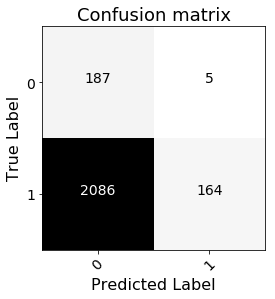

In [29]:
res2_7['y_pred'] = utils.convert_to_pass_fail(res2_7['y_pred'])

stats.print_big4(res2_7['y_true'], res2_7['y_pred'])
stats.print_stats(res2_7['y_true'], res2_7['y_pred'])
stats.plot_confusion_matrix(stats.cm(res2_7['y_true'], res2_7['y_pred']), classes=np.unique(res2_7['y_true']))